# Fixed Window Slicing for GAN Training Data

This notebook demonstrates how to use the new BurstFixedWindowSlicer for creating 4-minute windows with 50% overlap for GAN training.

## Key Features:
- Fixed 4-minute duration windows
- 50% overlap (2-minute step size)
- Burst-centered with 2-minute buffer zones
- Smart edge handling
- Direct scaling to 128×128 for GAN training


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Import our new slicing utilities
from slicing_utils_new import BurstFixedWindowSlicer, process_multiple_bursts

# Also import existing utilities for comparison
sys.path.append('../data_preprocessing')
from data_label import time_to_column_indices
from data_denoise import remove_horizontal_noise, remove_vertical_noise

print("✅ Imports successful!")

✅ Imports successful!


## 1. Setup and Configuration


In [ ]:
# Configuration
CSV_FILE_PATH = '/Users/remiliascarlet/Desktop/MDP/transfer_learning/burst_data/csv/original/240725113837-Skyline High School.csv'
SAVE_DIR = '/Users/remiliascarlet/Desktop/MDP/transfer_learning/burst_data/csv/saved_window_128'

# Burst timing (replace with your actual burst times)
BURST_START_TIME = '15:33:52'  # Replace with actual onset time
BURST_END_TIME = '15:35:47'    # Replace with actual offset time

print(f"Source file: {os.path.basename(CSV_FILE_PATH)}")
print(f"Burst time: {BURST_START_TIME} to {BURST_END_TIME}")
print(f"Output directory: {SAVE_DIR}")


Source file: 240725113837-Skyline High School.csv
Burst time: 15:33:52 to 15:35:47
Output directory: /Users/remiliascarlet/Desktop/MDP/transfer_learning/burst_data/csv/saved_window_128*128


In [7]:
# Create the fixed window slicer
slicer = BurstFixedWindowSlicer(
    window_duration=4*60,    # 4 minutes
    overlap_ratio=0.5,       # 50% overlap
    target_size=(128, 128)   # 128×128 for GAN training
)


BurstFixedWindowSlicer initialized:
  Window duration: 240s (2400 samples)
  Overlap: 50.0% (step: 1200 samples)
  Buffer zone: 2min (1200 samples)
  Target size: (128, 128)


In [8]:
# Process the burst with fixed windows
result = slicer.slice_burst_with_fixed_windows(
    csv_file_path=CSV_FILE_PATH,
    burst_start_time=BURST_START_TIME,
    burst_end_time=BURST_END_TIME,
    save_dir=SAVE_DIR,
    apply_denoising=True
)

print(f"\n📊 Results Summary:")
print(f"   Windows generated: {len(result['windows'])}")
print(f"   Window positions: {result['positions']}")
print(f"   Files saved: {len(result['saved_files'])}")



Processing burst: 15:33:52 to 15:35:47
Source: 240725113837-Skyline High School.csv
Loading CSV file: 240725113837-Skyline High School.csv
  Data shape: (250183, 411)
  Time range: 11:38:36.647 to 18:36:17.464
  Frequency channels: 411
  Applying noise removal...
High variance columns: []
Low variance rows: [  3   4   5   6 124 146 147 149 150 151 152 153 177 270 271 279 286 300
 301 302 303 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 352 353 354 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410]
  Data transposed: (250183, 411) -> (411, 250183)
  Converting time strings to indices...
    Burst indices: [140914, 142062]
  Calculating slicing range...
    Burst: [140914, 142062] (duration: 1148 samples)
    Total length: 250183 samples
    Ideal range: [139714, 143262]
    Final range: [139714, 143262]
    Coverage: 3548 samples (5.9 minutes)
  Extracting fixed windows...
    Window size: 2400 samples (

Saving windows: 100%|██████████| 3/3 [00:00<00:00, 133.85it/s]

  Saved 3 files

✅ Processing completed!
   Generated 3 windows of size (128, 128)
   Saved to: /Users/remiliascarlet/Desktop/MDP/transfer_learning/burst_data/csv/saved_window_128*128

📊 Results Summary:
   Windows generated: 3
   Window positions: [np.int64(139714), np.int64(140914), np.int64(142114)]
   Files saved: 3


## 2. Visualize Results


Loading original data for visualization...
Loading CSV file: 240725113837-Skyline High School.csv
  Data shape: (250183, 411)
  Time range: 11:38:36.647 to 18:36:17.464
  Frequency channels: 411
  Applying noise removal...
High variance columns: []
Low variance rows: [  3   4   5   6 124 146 147 149 150 151 152 153 177 270 271 279 286 300
 301 302 303 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 352 353 354 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410]
  Data transposed: (250183, 411) -> (411, 250183)
Original data shape: (411, 250183)
Burst region: [140914, 142062] (duration: 114.8s)
Visualization region: [138914, 144062] (duration: 514.8s)


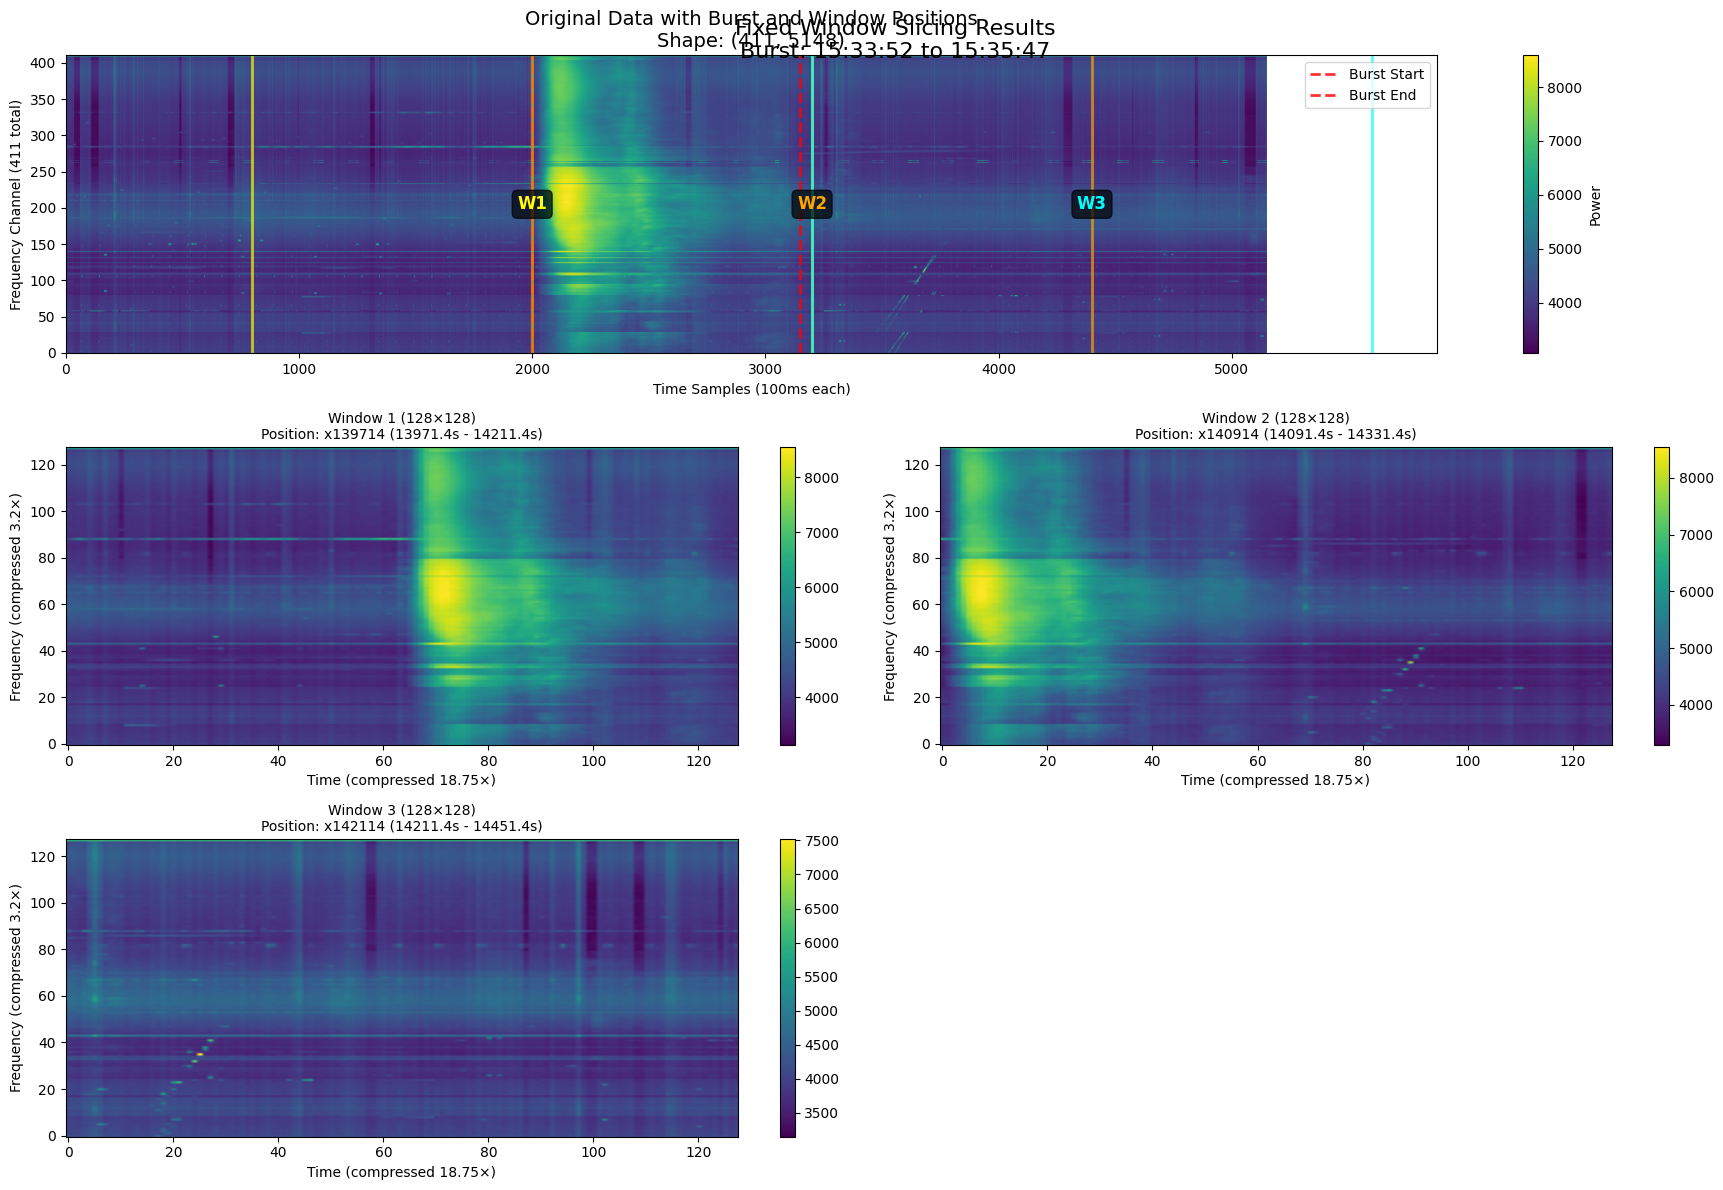


📊 Detailed Analysis:
   Original data: (411, 250183) (freq×time)
   Burst duration: 114.8 seconds
   Window duration: 240 seconds
   Window overlap: 50.0%
   Step size: 1200 samples (120.0s)

📈 Compression Analysis:
   Time compression: 2400→128 (18.8×)
   Frequency compression: 411→128 (3.2×)
   Total compression: 60.2× data reduction

📋 Window Details:
   Window 1: x139714 (13971.4s-14211.4s) | Shape: (128, 128) | Range: [3127.760, 8545.090]
   Window 2: x140914 (14091.4s-14331.4s) | Shape: (128, 128) | Range: [3288.959, 8545.090]
   Window 3: x142114 (14211.4s-14451.4s) | Shape: (128, 128) | Range: [3148.614, 7524.248]


In [9]:
# Load original data for comparison
print("Loading original data for visualization...")
processed_data, times, raw_data = slicer.load_and_preprocess_csv(CSV_FILE_PATH, apply_denoising=True)
transposed_data = slicer.transpose_data(processed_data)

# Get burst indices
start_idx, end_idx = time_to_column_indices(times, BURST_START_TIME, BURST_END_TIME)

# Extract visualization region (larger area around burst)
vis_buffer = 2000  # Show 2000 samples (~3.3 minutes) before and after
vis_start = max(0, start_idx - vis_buffer)
vis_end = min(transposed_data.shape[1], end_idx + vis_buffer)
vis_data = transposed_data[:, vis_start:vis_end]

print(f"Original data shape: {transposed_data.shape}")
print(f"Burst region: [{start_idx}, {end_idx}] (duration: {(end_idx-start_idx)*0.1:.1f}s)")
print(f"Visualization region: [{vis_start}, {vis_end}] (duration: {(vis_end-vis_start)*0.1:.1f}s)")

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))

# 1. Original data with burst and window positions
ax1 = plt.subplot(3, 2, (1, 2))  # Top row, spanning 2 columns
im1 = ax1.imshow(vis_data, aspect='auto', origin='lower', cmap='viridis')
ax1.set_title(f'Original Data with Burst and Window Positions\nShape: {vis_data.shape}', fontsize=14)
ax1.set_ylabel('Frequency Channel (411 total)')
ax1.set_xlabel('Time Samples (100ms each)')

# Mark burst boundaries
burst_start_vis = start_idx - vis_start
burst_end_vis = end_idx - vis_start
ax1.axvline(burst_start_vis, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Burst Start')
ax1.axvline(burst_end_vis, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Burst End')

# Mark window positions
colors = ['yellow', 'orange', 'cyan', 'magenta', 'lime']
for i, pos in enumerate(result['positions']):
    if vis_start <= pos <= vis_end:
        window_start_vis = pos - vis_start
        window_end_vis = window_start_vis + slicer.window_samples
        
        # Window boundaries
        color = colors[i % len(colors)]
        ax1.axvline(window_start_vis, color=color, linestyle='-', linewidth=2, alpha=0.7)
        ax1.axvline(window_end_vis, color=color, linestyle='-', linewidth=2, alpha=0.7)
        
        # Window label
        ax1.text(window_start_vis + slicer.window_samples//2, vis_data.shape[0]//2, 
                f'W{i+1}', ha='center', va='center', 
                color=color, fontweight='bold', fontsize=12,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

ax1.legend(loc='upper right')
plt.colorbar(im1, ax=ax1, label='Power')

# 2-5. Show individual generated windows
windows = result['windows']
positions = result['positions']
num_windows = len(windows)

for i in range(min(4, num_windows)):  # Show up to 4 windows
    ax = plt.subplot(3, 2, i+3)
    im = ax.imshow(windows[i], aspect='auto', origin='lower', cmap='viridis')
    
    # Calculate time info
    start_time_s = positions[i] * 0.1  # Convert to seconds
    end_time_s = (positions[i] + slicer.window_samples) * 0.1
    
    ax.set_title(f'Window {i+1} (128×128)\nPosition: x{positions[i]} ({start_time_s:.1f}s - {end_time_s:.1f}s)', 
                fontsize=10)
    ax.set_xlabel('Time (compressed 18.75×)')
    ax.set_ylabel('Frequency (compressed 3.2×)')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.suptitle(f'Fixed Window Slicing Results\nBurst: {BURST_START_TIME} to {BURST_END_TIME}', 
             fontsize=16, y=0.98)
plt.show()

# Print detailed statistics
print(f"\n📊 Detailed Analysis:")
print(f"   Original data: {transposed_data.shape} (freq×time)")
print(f"   Burst duration: {(end_idx-start_idx)*0.1:.1f} seconds")
print(f"   Window duration: {slicer.window_duration} seconds")
print(f"   Window overlap: {slicer.overlap_ratio*100}%")
print(f"   Step size: {slicer.step_samples} samples ({slicer.step_samples*0.1:.1f}s)")

print(f"\n📈 Compression Analysis:")
print(f"   Time compression: {slicer.window_samples}→128 ({slicer.window_samples/128:.1f}×)")
print(f"   Frequency compression: 411→128 ({411/128:.1f}×)")
print(f"   Total compression: {slicer.window_samples*411/(128*128):.1f}× data reduction")

print(f"\n📋 Window Details:")
for i, (window, pos) in enumerate(zip(windows, positions)):
    start_time = pos * 0.1
    end_time = (pos + slicer.window_samples) * 0.1
    print(f"   Window {i+1}: x{pos} ({start_time:.1f}s-{end_time:.1f}s) | "
          f"Shape: {window.shape} | Range: [{window.min():.3f}, {window.max():.3f}]")
